| RSI | Relative Strength Index |
| ----------- | ----------- |

In [39]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import datetime as dt

In [32]:
# Inputs
ticker = 'PLTR'
start = dt.datetime(2022,1,1)
end = dt.datetime.now()

In [33]:
# GET data
data = pdr.DataReader(ticker, 'yahoo', start, end)

data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-03,18.569000,17.860001,18.360001,18.530001,34283600,18.530001
2022-01-04,18.840000,17.790001,18.610001,18.170000,39643200,18.170000
2022-01-05,18.568001,16.870001,18.030001,16.959999,58445900,16.959999
2022-01-06,17.180000,16.055000,16.870001,16.740000,49737100,16.740000
2022-01-07,17.330000,16.475000,16.700001,16.559999,37989300,16.559999
...,...,...,...,...,...,...
2022-12-08,7.270000,6.940000,7.100000,7.120000,23107700,7.120000
2022-12-09,7.190000,7.030000,7.060000,7.110000,23346000,7.110000
2022-12-12,7.310000,7.090000,7.110000,7.290000,22672400,7.290000


In [34]:
# Calculate delta (difference)
delta = data['Adj Close'].diff(1) # Compared current row to the previous row (day) 
# -> Check for increase or decrease in value

# Drop any NAs
delta.dropna(inplace=True)

# Save positive and negative movements with copy()
positive = delta.copy()
negative = delta.copy()

# Formulate query -> All positive values remain the same but everything negative is a minimum value of zero (0)
positive[positive < 0] = 0
negative[negative > 0] = 0

# Specify a time period
days = 14 # Usually RSI is calculated over 14 days for the baseline indicator

# Calculate averages -> gain and loss
#POSTIVE GAIN
average_gain = positive.rolling(window=days).mean() # Aggregate days and calculate the mean
#NEGATIVE GAIN
average_loss = abs(negative.rolling(window=days).mean())
"""  
Absolute value for average loss
This is the absolute difference
"""

# RELATIVE STRENGTH -> Calculate
relative_strength = average_gain / average_loss

# RELATIVE STRENGHT INDEX -> Formula calculation
RSI = 100.0 - (100.0 / (1.0 + relative_strength))

In [35]:
"""
Plot results 
"""
# Create a combined data frame
combined_df = pd.DataFrame()
combined_df['Adj Close'] = data['Adj Close']
combined_df['RSI'] = RSI

# Eyeball check to -> see if things look somewhat accurate
combined_df.iloc[50:60]

,Adj Close,RSI
Date,,
2022-03-16,11.79,49.666667
2022-03-17,12.32,56.888165
2022-03-18,12.82,57.710648
2022-03-21,12.59,53.311793
2022-03-22,13.27,58.962965
2022-03-23,13.18,65.032684
2022-03-24,13.39,70.420175
2022-03-25,12.97,64.951775
2022-03-28,13.42,68.030305


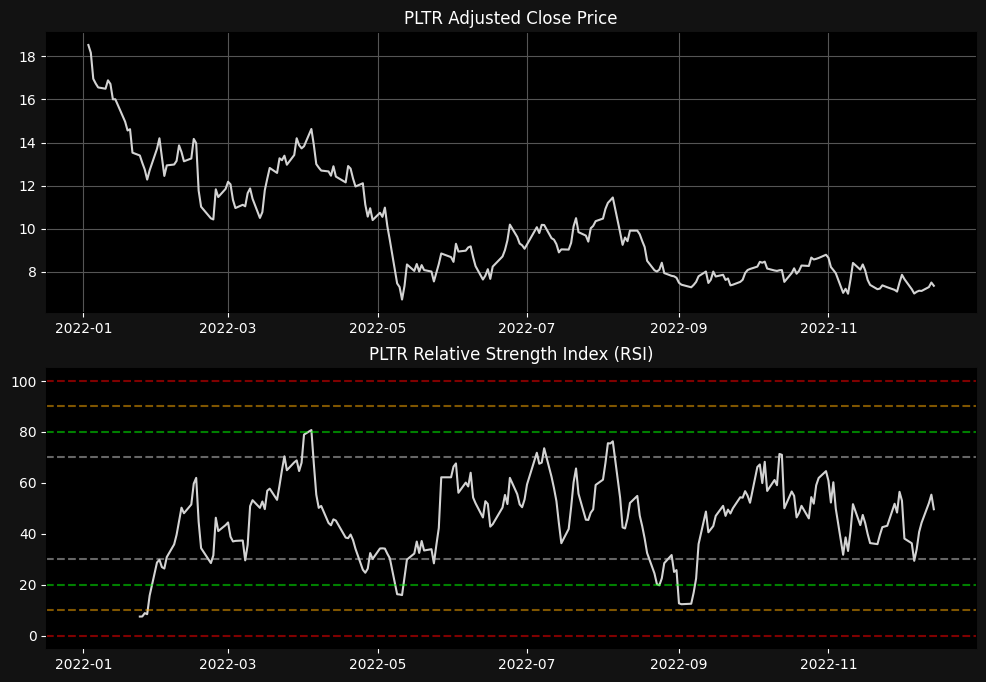

In [38]:
# Set up plot 1 (stock performance over time period)
plt.figure(figsize=(12,8))
ax1 = plt.subplot(211)
ax1.plot(combined_df.index, combined_df['Adj Close'], color='lightgray')
ax1.set_title(f'{ticker} Adjusted Close Price', color='white') # Use white color on dark background (coming later)

ax1.grid(True, color='#555555')
ax1.set_axisbelow(True)
ax1.set_facecolor('black')
ax1.figure.set_facecolor('#121212')
ax1.tick_params(axis='x', colors='white')
ax1.tick_params(axis='y', colors='white')

# Set up plot 2 (RSI)
ax2 = plt.subplot(212, sharex=ax1) # Set axis as not independent but instead the same for both plots
ax2.plot(combined_df.index, combined_df['RSI'], color='lightgrey')
ax2.axhline(0, linestyle='--', alpha=0.5, color='#ff0000') #1
ax2.axhline(10, linestyle='--', alpha=0.5, color='#ffaa00') #2
ax2.axhline(20, linestyle='--', alpha=0.5, color='#00ff00') #3
ax2.axhline(30, linestyle='--', alpha=0.5, color='#cccccc') #4
ax2.axhline(70, linestyle='--', alpha=0.5, color='#cccccc') #5
ax2.axhline(80, linestyle='--', alpha=0.5, color='#00ff00') #6
ax2.axhline(90, linestyle='--', alpha=0.5, color='#ffaa00') #7
ax2.axhline(100, linestyle='--', alpha=0.5, color='#ff0000') #8

ax2.set_title(f'{ticker} Relative Strength Index (RSI)', color='white')
ax2.grid(False)
ax2.set_axisbelow(True)
ax2.set_facecolor('black')
ax2.tick_params(axis='x', colors='white')
ax2.tick_params(axis='y', colors='white')


| END OF PROGRAM |
| ----------- |
| Notes for future DEV, and reference code below |